<a href="https://colab.research.google.com/github/shirishbahirat/artificial-intelligence/blob/master/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

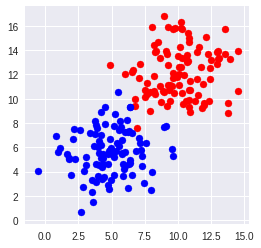

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    
n_pts=100
np.random.seed(0)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts)]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts)]).T
_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
plt.show()